In [1]:
import NeuroAnalysisTools
import NeuroAnalysisTools.core.FileTools as ft
import NeuroAnalysisTools.RetinotopicMapping as rm
import os
import tifffile as tf
from os.path import join as pjoin
import numpy as np
from scipy.ndimage import gaussian_filter,median_filter
import matplotlib.pyplot as plt

%matplotlib inline


In [145]:
# load data

path = r'Y:\WF_WRX\P42\20240726\DOM\1_Retinotopy\process\20240726-170926-retinotopy'
altitude_map = np.load(pjoin(path,'phase_el.npy'))
azimuth_map = np.load(pjoin(path,'phase_az.npy'))
altitude_power_map = np.load(pjoin(path,'mag_el.npy'))
azimuth_power_map = np.load(pjoin(path,'mag_az.npy'))
vasculature_map = np.load(path[:-10]+r'wfield\frames_average.npy')[0]

In [146]:
altitude_power_map = median_filter(altitude_power_map,5)
azimuth_power_map = median_filter(azimuth_power_map,5)

# Defining image analysis parameters
#### This is probably the most important part of the whole analysis! The 14 parameters below define the final segmentation results.

phaseMapFilterSigma: The sigma value (in pixels) of Gaussian filter for altitude and azimuth maps. FLOAT, default = 1.0, recommended range: [0.0, 2.0]. Large "phaseMapFilterSigma" gives you more patches. Small "phaseMapFilterSigma" gives you less patches.

signMapFilterSigma: The sigma value (in pixels) of Gaussian filter for visual sign maps. FLOAT, default = 9.0, recommended range: [0.6, 10.0]. Large "signMapFilterSigma" gives you less patches. Small "signMapFilterSigma" gives you more patches.

signMapThr: Threshold to binarize visual signmap. FLOAT, default = 0.35, recommended range: [0.2, 0.5], allowed range: [0, 1). Large signMapThr gives you fewer patches. Smaller signMapThr gives you more patches.

closeIter: Binary close iteration for each raw patches. INT, default = 3. You do not want to change this parameter very often.

openIter: Binary open iteration for each raw patches. INT, default = 3. You do not want to change this parameter very often

dilationIter: Binary dilation iteration for each raw patches. INT, default = 15. You do not want to change this parameter very often.

borderWidth: Pixel number between adjcent patches. INT, default = 1. You do not want to change this parameter very often.

smallPatchThr: The patches with pixel number below smallPatchThr will be discarded. INT, default = 100. You do not want to change this parameter very often.

eccMapFilterSigma: The sigma value of Gaussian filter for eccentricity maps. FLOAT, default = 10.0. You do not want to change this parameter very often.

visualSpacePixelSize: The pixel size for patch to visual space mapping. FLOAT, default = 0.5. You do not want to change this parameter very often.

visualSpaceCloseIter: The binary iteration for visual space coverage for each patch. INT, default = 15. You do not want to change this parameter very often.

splitLocalMinCutStep: The step width for detecting number of local minimums during spliting. The local minimums detected will be used as marker in the following open cv watershed segmentation. FLOAT, default = 5.0, recommend range: [0.5, 15.0]. Small "splitLocalMinCutStep" will make it more likely to split but into less sub patches. Large "splitLocalMinCutStep" will make it less likely to split but into more sub patches.

splitOverlapThr: Patches with overlap ration larger than this value will go through the split procedure. FLOAT, default = 1.1, recommend range: [1.0, 1.2], should be larger than 1.0. Small "splitOverlapThr" will split more patches. Large "splitOverlapThr" will split less patches.

mergeOverlapThr: Considering a patch pair (A and B) with same sign, A has visual coverage a deg2 and B has visual coverage b deg2 and the overlaping visual coverage between this pair is c deg2. Then if (c/a < "mergeOverlapThr") and (c/b < "mergeOverlapThr"), these two patches will be merged. FLOAT, default = 0.1, recommend range: [0.0, 0.2], should be smaller than 1.0. Small "mergeOverlapThr" will merge less patches. Large "mergeOverlapThr" will merge more patches.

In [213]:
# import pickle
# with open(pjoin(path,'retinotopy_out.pkl'), 'rb') as f:
#     data = pickle.load(f)
#     
# data['params']
# data.keys()

{'phaseMapFilterSigma': 0.5,
 'signMapFilterSigma': 11,
 'signMapThr': 0.12,
 'eccMapFilterSigma': 10,
 'splitLocalMinCutStep': 5,
 'closeIter': 3,
 'openIter': 3,
 'dilationIter': 15,
 'borderWidth': 1,
 'smallPatchThr': 100,
 'visualSpacePixelSize': 0.5,
 'visualSpaceCloseIter': 15,
 'splitOverlapThr': 1.1,
 'mergeOverlapThr': 0.1}

In [214]:
params = {
          'phaseMapFilterSigma': 0.5,
          'signMapFilterSigma': 11,
          'signMapThr': 0.12,
          'eccMapFilterSigma': 10,
          'splitLocalMinCutStep': 5,
          'closeIter': 3,
          'openIter': 3,
          'dilationIter': 15,
          'borderWidth': 1,
          'smallPatchThr': 100,
          'visualSpacePixelSize': 0.5,
          'visualSpaceCloseIter': 15,
          'splitOverlapThr': 1.1,
          'mergeOverlapThr': 0.1
          }

In [215]:
# Creating the RetinotopicMappingTrail object

trial = rm.RetinotopicMappingTrial(altPosMap=altitude_map,
                                   aziPosMap=azimuth_map,
                                   altPowerMap=altitude_power_map,
                                   aziPowerMap=azimuth_power_map,
                                   vasculatureMap=vasculature_map,
                                   mouseID='P42',
                                   dateRecorded='20240726',
                                   comments='',
                                   params=params)
print(trial)

A retinotopic mapping trial: 20240726_MP42


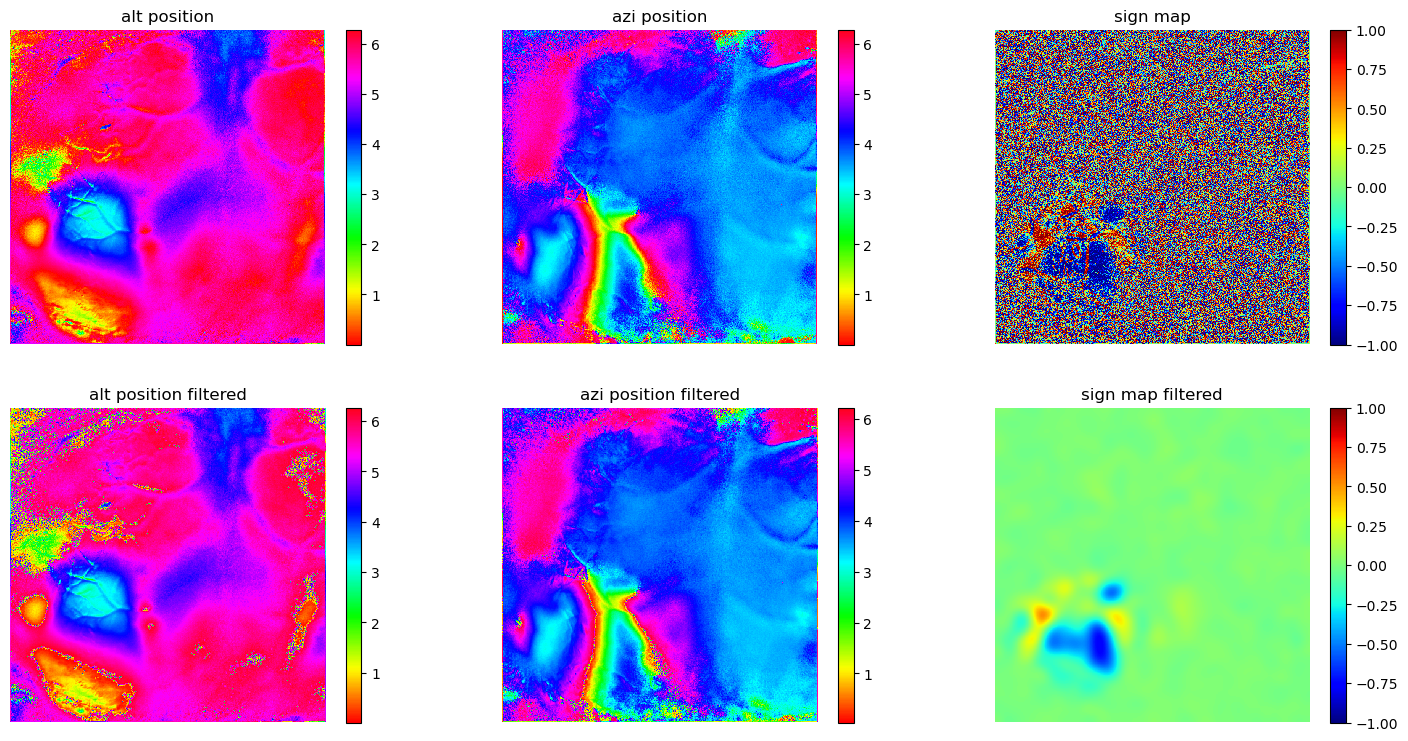

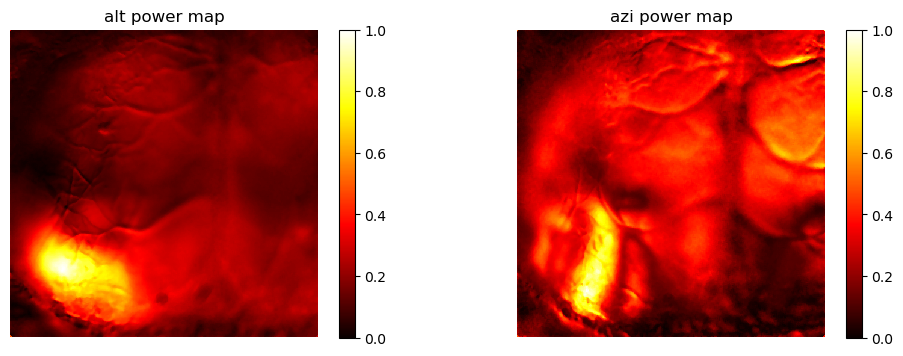

In [216]:
# Generating visual sign map

trial._getSignMap(isPlot=True, isReverse=False, isFixedRange=False)
plt.show()

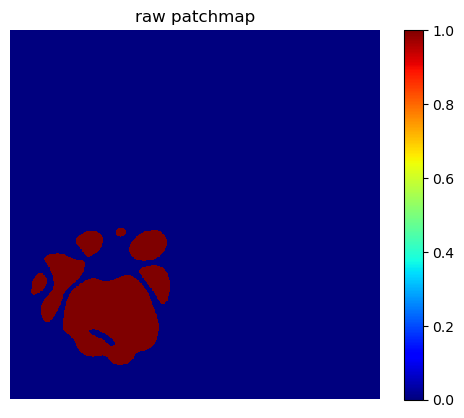

In [217]:
# Binarizing filtered visual signmap

trial._getRawPatchMap(isPlot=True)
plt.show()

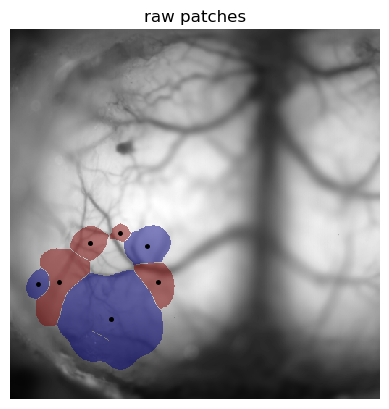

In [218]:
# Generating raw patches

trial._getRawPatches(isPlot=True)
plt.show()

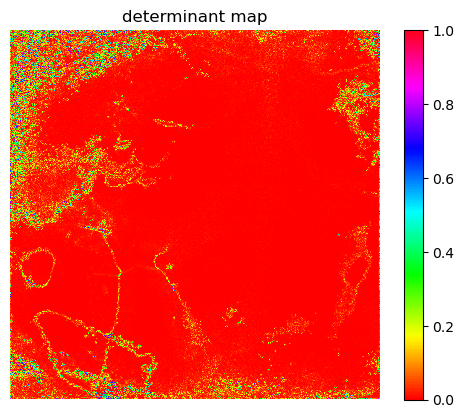

In [219]:
# Generating determinant map

trial._getDeterminantMap(isPlot=True)
plt.show()

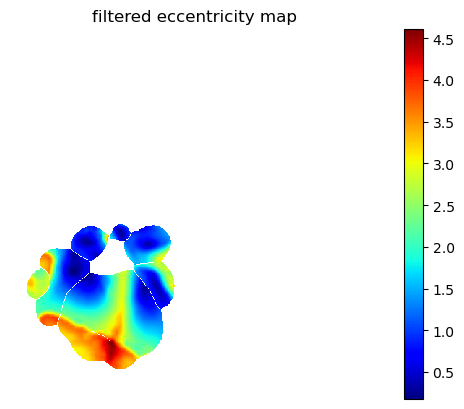

In [220]:
# Generating eccentricity map for each patch

trial._getEccentricityMap(isPlot=True)
plt.show()

patch01AU=41.75 AS=265.1064192070129 ratio=6.349854352263782
Only one local minumum was found!!!
patch02AU=12.25 AS=23.66140245120118 ratio=1.9315430572409127
Only one local minumum was found!!!
patch03AU=13.0 AS=18.256160466063022 ratio=1.4043200358510017
Only one local minumum was found!!!
patch04AU=28.25 AS=72.63903058439851 ratio=2.571293118031806
Only one local minumum was found!!!
patch05AU=14.75 AS=46.600622263434225 ratio=3.159364221249778
Only one local minumum was found!!!
patch06AU=29.75 AS=86.38373941209444 ratio=2.903655106288889
Only one local minumum was found!!!
patch07AU=4.75 AS=3.3923853769037713 ratio=0.714186395137636


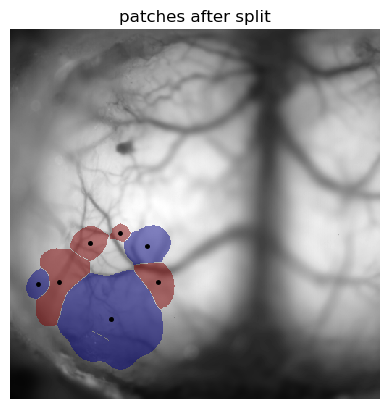

In [221]:
# Splitting overlapping patches

trial._splitPatches(isPlot=True)
plt.show()

merge iteration: 1


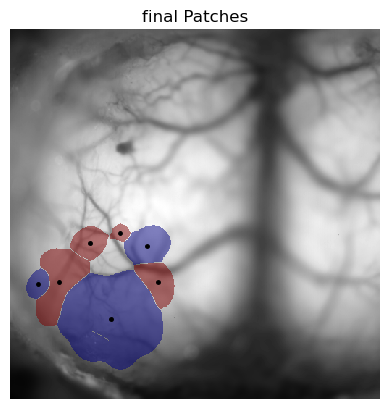

In [222]:
# Merging non-overlapping patches

trial._mergePatches(isPlot=True)
plt.show()

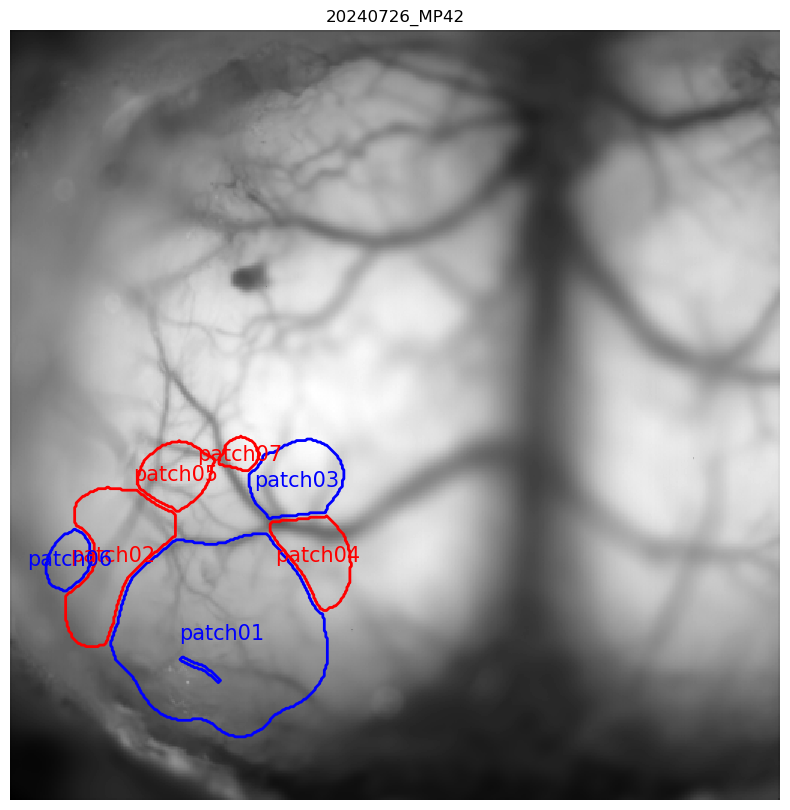

In [223]:
# Plotting results

trial.plotFinalPatchBorders2()
plt.show()

In [224]:
# Annotating segmented patches

names = [
        ['patch01', 'V1'],
        ['patch02', 'LM'],
        ['patch03', 'AM'],
        ['patch04', 'PM'],
        ['patch05', 'RL'],
        ['patch06', 'AL'],
        ['patch07', 'A'],
        # ['patch08', 'AM'],
        # ['patch09', 'AL'],
        # ['patch11', 'RL'],
        # ['patch12', 'A'],
        ]

finalPatchesMarked = dict(trial.finalPatches)

for i, namePair in enumerate(names):
    currPatch = finalPatchesMarked.pop(namePair[0])
    newPatchDict = {namePair[1]:currPatch}
    finalPatchesMarked.update(newPatchDict)
    
trial.finalPatchesMarked = finalPatchesMarked

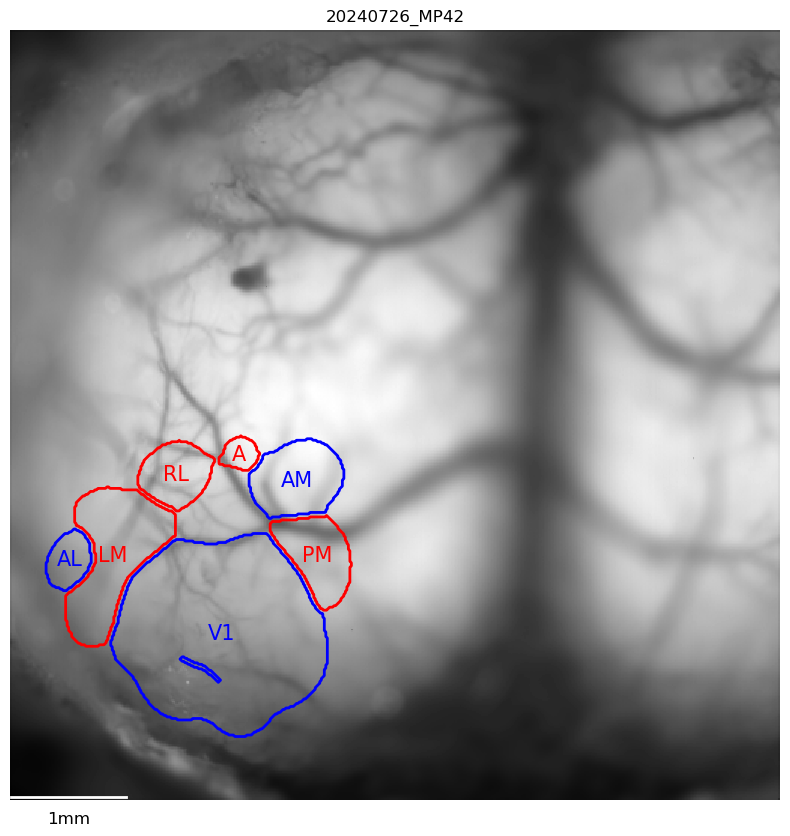

In [225]:
# Ploting final results

trial.plotFinalPatchBorders2(pixel_um=13)
plt.savefig(os.path.join(path, 'visual_areas.png'), dpi=300, bbox_inches='tight')
plt.show()


In [226]:
# Generating dictionary for saving

trialDict = trial.generateTrialDict()
trialDict.keys()

dict_keys(['mouseID', 'dateRecorded', 'altPosMap', 'aziPosMap', 'altPowerMap', 'aziPowerMap', 'vasculatureMap', 'comments', 'params', 'altPosMapf', 'aziPosMapf', 'altPowerMapf', 'aziPowerMapf', 'signMap', 'signMapf', 'rawPatchMap', 'eccentricityMapf', 'finalPatches', 'finalPatchesMarked'])

In [227]:
# Saving results

ft.saveFile(pjoin(path,'retinotopy_out.pkl'), trialDict)

In [228]:
import pickle
with open(pjoin(path,'retinotopy_out.pkl'), 'rb') as f:
    data = pickle.load(f)
    
data['finalPatchesMarked']

{'V1': <NeuroAnalysisTools.RetinotopicMapping.Patch at 0x1e1a7bcd810>,
 'LM': <NeuroAnalysisTools.RetinotopicMapping.Patch at 0x1e1a7bf5110>,
 'AM': <NeuroAnalysisTools.RetinotopicMapping.Patch at 0x1e1a7bf4710>,
 'PM': <NeuroAnalysisTools.RetinotopicMapping.Patch at 0x1e1a7bf5a90>,
 'RL': <NeuroAnalysisTools.RetinotopicMapping.Patch at 0x1e1a7be7f50>,
 'AL': <NeuroAnalysisTools.RetinotopicMapping.Patch at 0x1e1a7be4990>,
 'A': <NeuroAnalysisTools.RetinotopicMapping.Patch at 0x1e1a7be7290>}